In [2]:
!pip3 install ipykernel
!pip3 install --upgrade nbformat


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('./lstm_datasets/cdi_predictions.csv')

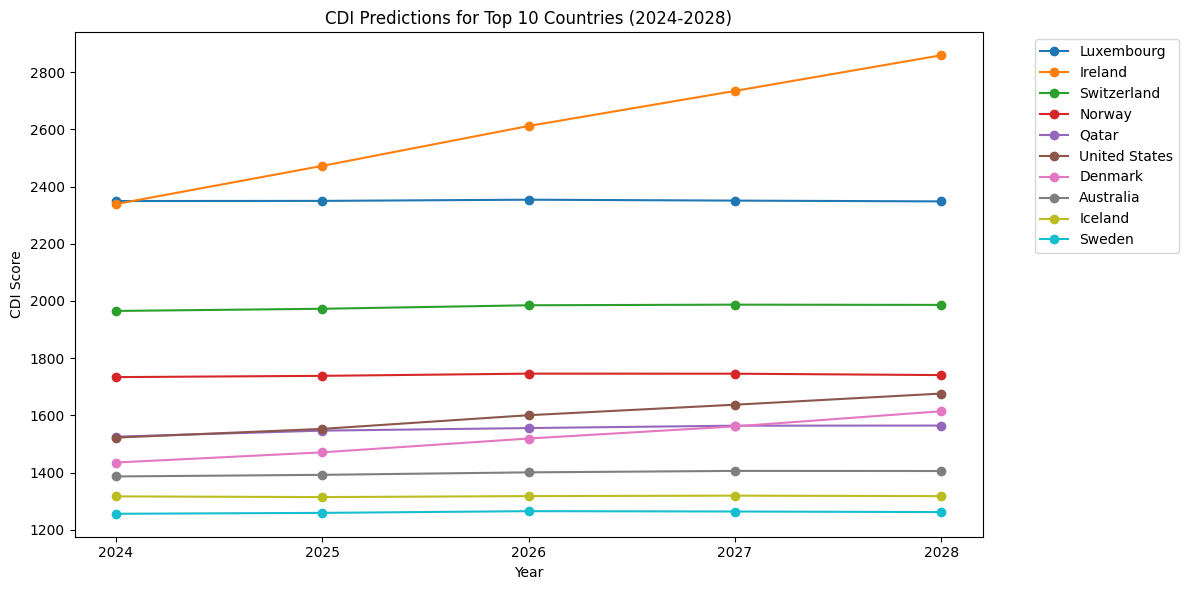

In [5]:
plt.figure(figsize=(12, 6))
top_10_countries = df.nlargest(10, '2024 CDI')
for _, row in top_10_countries.iterrows():
    plt.plot(['2024', '2025', '2026', '2027', '2028'], 
             row[['2024 CDI', '2025 CDI', '2026 CDI', '2027 CDI', '2028 CDI']], 
             marker='o', 
             label=row['Country'])
plt.title('CDI Predictions for Top 10 Countries (2024-2028)')
plt.xlabel('Year')
plt.ylabel('CDI Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

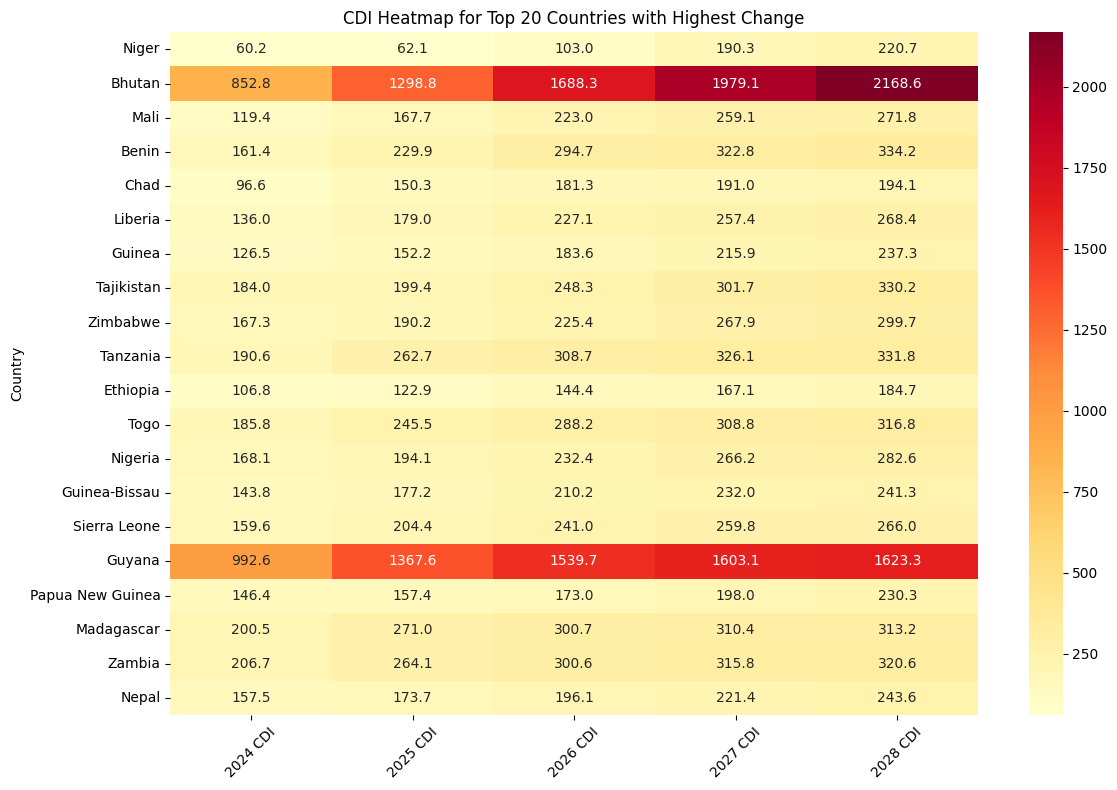

In [6]:
plt.figure(figsize=(12, 8))
changes_df = df.set_index('Country')[['2024 CDI', '2028 CDI']].pct_change(axis=1)['2028 CDI']
changes_df = changes_df.sort_values(ascending=False)
top_20_changes = changes_df.head(20)
sns.heatmap(df.set_index('Country').loc[top_20_changes.index], 
            cmap='YlOrRd', 
            annot=True, 
            fmt='.1f')
plt.title('CDI Heatmap for Top 20 Countries with Highest Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

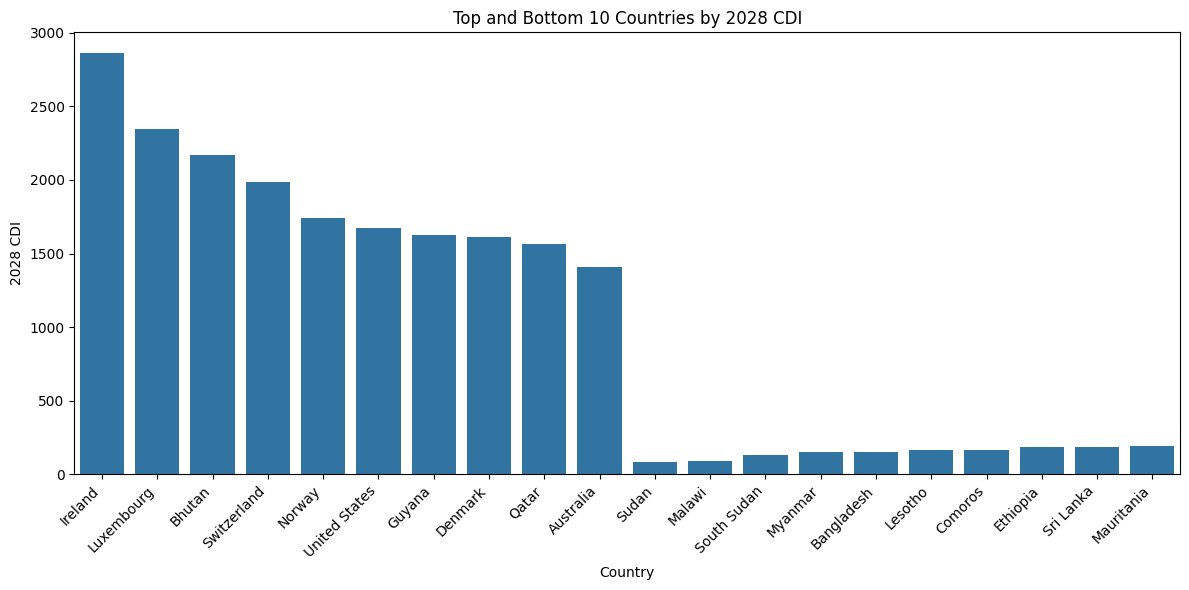

In [7]:
plt.figure(figsize=(12, 6))
top_bottom = pd.concat([df.nlargest(10, '2028 CDI'), df.nsmallest(10, '2028 CDI')])
sns.barplot(data=top_bottom, x='Country', y='2028 CDI')
plt.xticks(rotation=45, ha='right')
plt.title('Top and Bottom 10 Countries by 2028 CDI')
plt.tight_layout()
plt.show()

In [8]:
fig = px.choropleth(df, 
                    locations='Country', # country names
                    locationmode='country names',
                    color='2024 CDI',
                    hover_name='Country',
                    hover_data=['2024 CDI', '2028 CDI'],
                    color_continuous_scale='RdYlBu',
                    title='Global CDI Scores 2024')

# Update layout
fig.update_layout(
    title_x=0.5,
    geo=dict(showframe=False,
             showcoastlines=True,
             projection_type='equirectangular'),
    width=1000,
    height=600
)

fig.show()

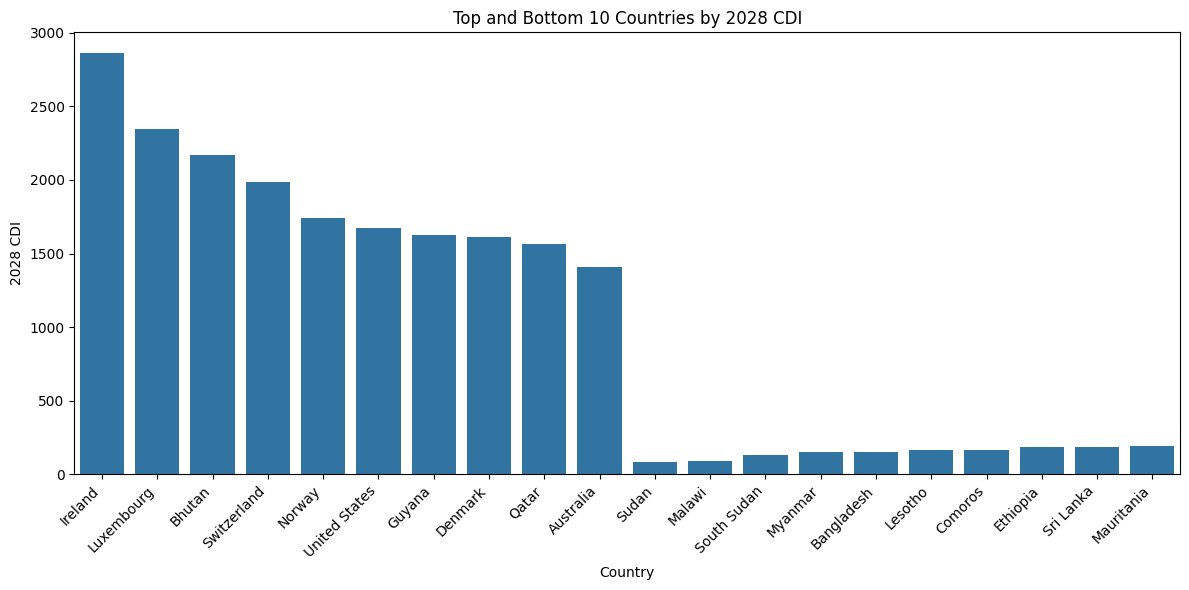

In [9]:
plt.figure(figsize=(12, 6))
top_bottom = pd.concat([df.nlargest(10, '2028 CDI'), df.nsmallest(10, '2028 CDI')])
sns.barplot(data=top_bottom, x='Country', y='2028 CDI')
plt.xticks(rotation=45, ha='right')
plt.title('Top and Bottom 10 Countries by 2028 CDI')
plt.tight_layout()
plt.show()

In [10]:
df_melted = df.melt(id_vars=['Country'], 
                    value_vars=['2024 CDI', '2025 CDI', '2026 CDI', '2027 CDI', '2028 CDI'],
                    var_name='Year', 
                    value_name='CDI')

fig_animated = px.choropleth(df_melted,
                            locations='Country',
                            locationmode='country names',
                            color='CDI',
                            animation_frame='Year',
                            hover_name='Country',
                            color_continuous_scale='RdYlBu',
                            title='Global CDI Scores Evolution (2024-2028)')

# Update layout
fig_animated.update_layout(
    title_x=0.5,
    geo=dict(showframe=False,
             showcoastlines=True,
             projection_type='equirectangular'),
    width=1000,
    height=600
)

fig_animated.show()

/Users/davidshan/Library/Python/3.12/lib/python/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

